# import needed library

In [1]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt 
from sklearn import preprocessing 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets

from numpy import log,dot,exp,shape
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.preprocessing import FunctionTransformer
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif as mic
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


# read data frm local path

In [2]:
data_frame=pd.read_csv(r'C:\Users\start\Documents\CIB\Assignments\project\clean_dataset.csv')

# preprossing data

In [3]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


# split data to featurs and target

In [4]:
X = data_frame.drop(['Approved'], axis = 1)
Y = data_frame['Approved']

# labelEncoder

In [5]:
lable = ['Industry', 'Ethnicity', 'Citizen']

encoder = preprocessing.LabelEncoder()
data_frame[lable] = data_frame[lable].apply(encoder.fit_transform)

In [6]:
data_frame

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,7,4,1.25,1,1,1,0,0,202,0,1
1,0,58.67,4.460,1,1,9,1,3.04,1,1,6,0,0,43,560,1
2,0,24.50,0.500,1,1,9,1,1.50,1,0,0,0,0,280,824,1
3,1,27.83,1.540,1,1,7,4,3.75,1,1,5,1,0,100,3,1
4,1,20.17,5.625,1,1,7,4,1.71,1,0,0,0,1,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,3,1,1.25,0,0,0,0,0,260,0,0
686,0,22.67,0.750,1,1,4,4,2.00,0,1,2,1,0,200,394,0
687,0,25.25,13.500,0,0,6,2,2.00,0,1,1,1,0,200,1,0
688,1,17.92,0.205,1,1,2,4,0.04,0,0,0,0,0,280,750,0


# measure of the similarity between the labels

In [7]:
Categorical_Feature = data_frame[['Gender', 'Married', 'BankCustomer', 'Industry', 'Ethnicity', 'Citizen', 
                     'PriorDefault', 'Employed', 'DriversLicense']]

In [8]:
Categorical = mic(Categorical_Feature, data_frame.Approved, discrete_features=True)
Categorical = pd.Series(Categorical, index=Categorical_Feature.columns)

In [9]:
Discrete_Feature = ['ZipCode', 'Income', 'CreditScore']

In [10]:
Discrete = mic(data_frame[Discrete_Feature], data_frame.Approved, discrete_features=True)
Discrete = pd.Series(Discrete, index=data_frame[Discrete_Feature].columns)

In [11]:
Continuous_Feature = ['Age', 'Debt', 'YearsEmployed']

In [12]:
Continuous = mic(data_frame[Continuous_Feature], data_frame.Approved, discrete_features=False)
Continuous = pd.Series(Continuous, index=data_frame[Continuous_Feature].columns)

In [13]:
mi_score = pd.concat([Categorical, Discrete, Continuous], axis=0)
mi_score = pd.Series(mi_score, name="MI Scores", index=X.columns)
mi_score = mi_score.sort_values(ascending=False)
print(mi_score)

Income            0.303647
PriorDefault      0.295079
ZipCode           0.201648
CreditScore       0.167950
Employed          0.108329
Industry          0.075664
YearsEmployed     0.061593
Ethnicity         0.032413
BankCustomer      0.018488
Married           0.016834
Debt              0.011751
Citizen           0.006957
DriversLicense    0.000500
Gender            0.000418
Age               0.000000
Name: MI Scores, dtype: float64


# drop featurs with mi score low than .01

In [94]:
X = data_frame.drop(['Citizen', 'Age', 'DriversLicense', 'Gender'], axis=1)


In [95]:
#X = stats.zscore(X)  ####

#log_transformer = FunctionTransformer(np.log1p)

# Apply the transformation
#X_log = log_transformer.transform(X)

# convert dataframe to array numpy 

In [15]:
X = X.values
Y = Y.values

In [16]:
X

array([[0.000e+00, 1.000e+00, 1.000e+00, ..., 2.020e+02, 0.000e+00,
        1.000e+00],
       [4.460e+00, 1.000e+00, 1.000e+00, ..., 4.300e+01, 5.600e+02,
        1.000e+00],
       [5.000e-01, 1.000e+00, 1.000e+00, ..., 2.800e+02, 8.240e+02,
        1.000e+00],
       ...,
       [1.350e+01, 0.000e+00, 0.000e+00, ..., 2.000e+02, 1.000e+00,
        0.000e+00],
       [2.050e-01, 1.000e+00, 1.000e+00, ..., 2.800e+02, 7.500e+02,
        0.000e+00],
       [3.375e+00, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [17]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

# use scaling for features

In [96]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# bult  the Model of Perceptron

In [97]:
class Perceptron_algorithm:
    
    def __init__(self, learning_rate=0.01, epochs=1000,w = None,b= None):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w = w
        self.b = b
            
    def activation_function(self, x):
        
        activation=np.where(x>=0, 1, 0) 
       
    
        return activation   
    
    def fit(self,X,Y):
        
        num_sample, num_feat=X.shape
        #self.b = 0
        
        for iter in range(self.epochs):
            for idx, x_iter in enumerate(X):
                linear_output = np.dot(x_iter, self.w) + self.b
                #predict item after using activation finc
                y_predicted = self.activation_function(linear_output)
                
                # Perceptron update rule
                update = self.learning_rate * (y_predicted - Y[idx])
                
                self.w = self.w - update * x_iter
                self.b = self.b - update
            print("new w and new bais {}----->{} :)".format(self.w, self.b))   
                               
                
    def predict(self, X):
        
        linear_output = np.dot(X, self.w) + self.b
        y_predicted = self.activation_function(linear_output)
        
        return y_predicted
        

In [37]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

# initialize the weight array W0

In [38]:
 num_sample, num_feat=X_train.shape

In [39]:
 wait=np.random.random(num_feat)

In [98]:
wait

array([0.66878203, 0.60093274, 0.92775146, 0.6248495 , 0.29859687,
       0.67446687, 0.51239625, 0.26107405, 0.57610987, 0.97046705,
       0.59189517, 0.9531352 ])

In [40]:
print(wait.shape)

(12,)


# deploy the model

In [99]:
model=Perceptron_algorithm(learning_rate=0.001, epochs=50,w = wait,b=0)

In [100]:
model.fit(X_train, y_train)

new w and new bais [0.62943191 0.54049649 0.86716794 0.60630156 0.28620854 0.66296063
 0.51950962 0.25160182 0.57306958 0.91798845 0.59431585 1.03026611]----->-0.003 :)
new w and new bais [0.59106835 0.4817337  0.8082495  0.58708356 0.27614029 0.6507217
 0.52551356 0.24353289 0.56896056 0.8668033  0.59604352 1.10470717]----->-0.003 :)
new w and new bais [0.55507591 0.43113809 0.75751134 0.5726422  0.2656051  0.63514872
 0.52744236 0.23370984 0.5607475  0.81778486 0.5965376  1.17131923]----->-0.001 :)
new w and new bais [0.52181704 0.39006375 0.71633675 0.55633475 0.25399012 0.61915035
 0.52351225 0.21932609 0.55291584 0.76897882 0.59742518 1.23145816]----->-0.003 :)
new w and new bais [0.4933254  0.35480608 0.68098569 0.5344558  0.24593552 0.60206351
 0.51950962 0.20318822 0.54293681 0.72416452 0.59778388 1.28578001]----->-0.003 :)
new w and new bais [0.46877972 0.32301456 0.64910143 0.51410121 0.2340579  0.58361731
 0.51143185 0.183279   0.53159306 0.68480312 0.59784671 1.33629671]---

# predict the train data

In [85]:
train_predictions = model.predict(X_train)

In [86]:
print(f'Perceptron classification accuracy: {accuracy(y_train, train_predictions)}')

Perceptron classification accuracy: 0.9963768115942029


# show the  confusion_matrix

In [87]:
cm = confusion_matrix(y_train,train_predictions)

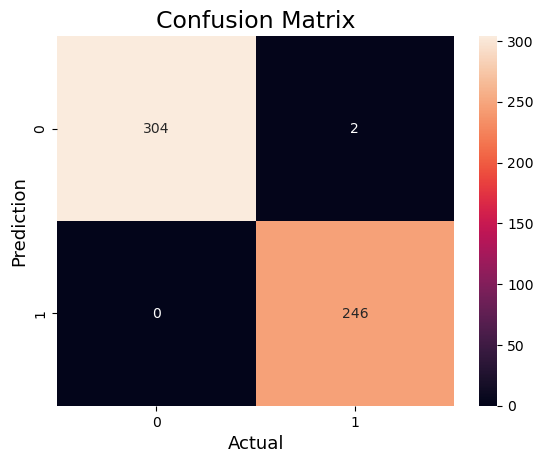

In [88]:
sns.heatmap(cm, 
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# predict test data and show confusion_matrix

In [101]:
test_predictions = model.predict(X_test)

In [102]:
print(f'Perceptron classification accuracy: {accuracy(y_test, test_predictions)}')

Perceptron classification accuracy: 0.9927536231884058


In [103]:
cmt = confusion_matrix(y_test,test_predictions)

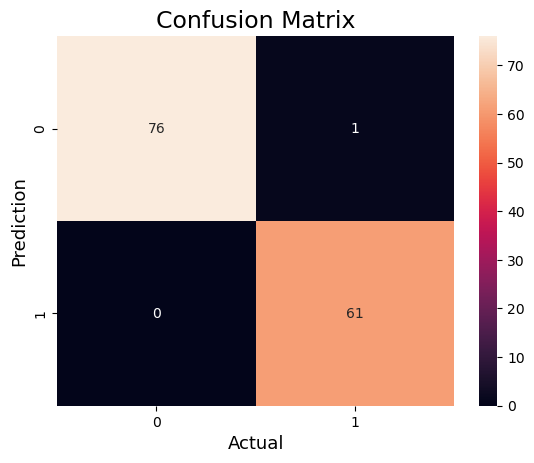

In [104]:
sns.heatmap(cmt, 
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()